In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
restaurant_data= pd.read_csv("Resources/zomato.csv",encoding="ISO-8859-1")

In [3]:
features =restaurant_data[["Cuisines","Table_booking",
                                                     "Online_delivery","Price_range"]]

In [4]:
features_binary_encoded = pd.get_dummies(features)

In [5]:
features_name = features_binary_encoded.columns

In [6]:
review = restaurant_data["Rating_text"]
review_binary_encoded = pd.get_dummies(review)

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_binary_encoded, review_binary_encoded, random_state=42)


In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test.astype(int), y_test.astype(int))


0.10343383584589615

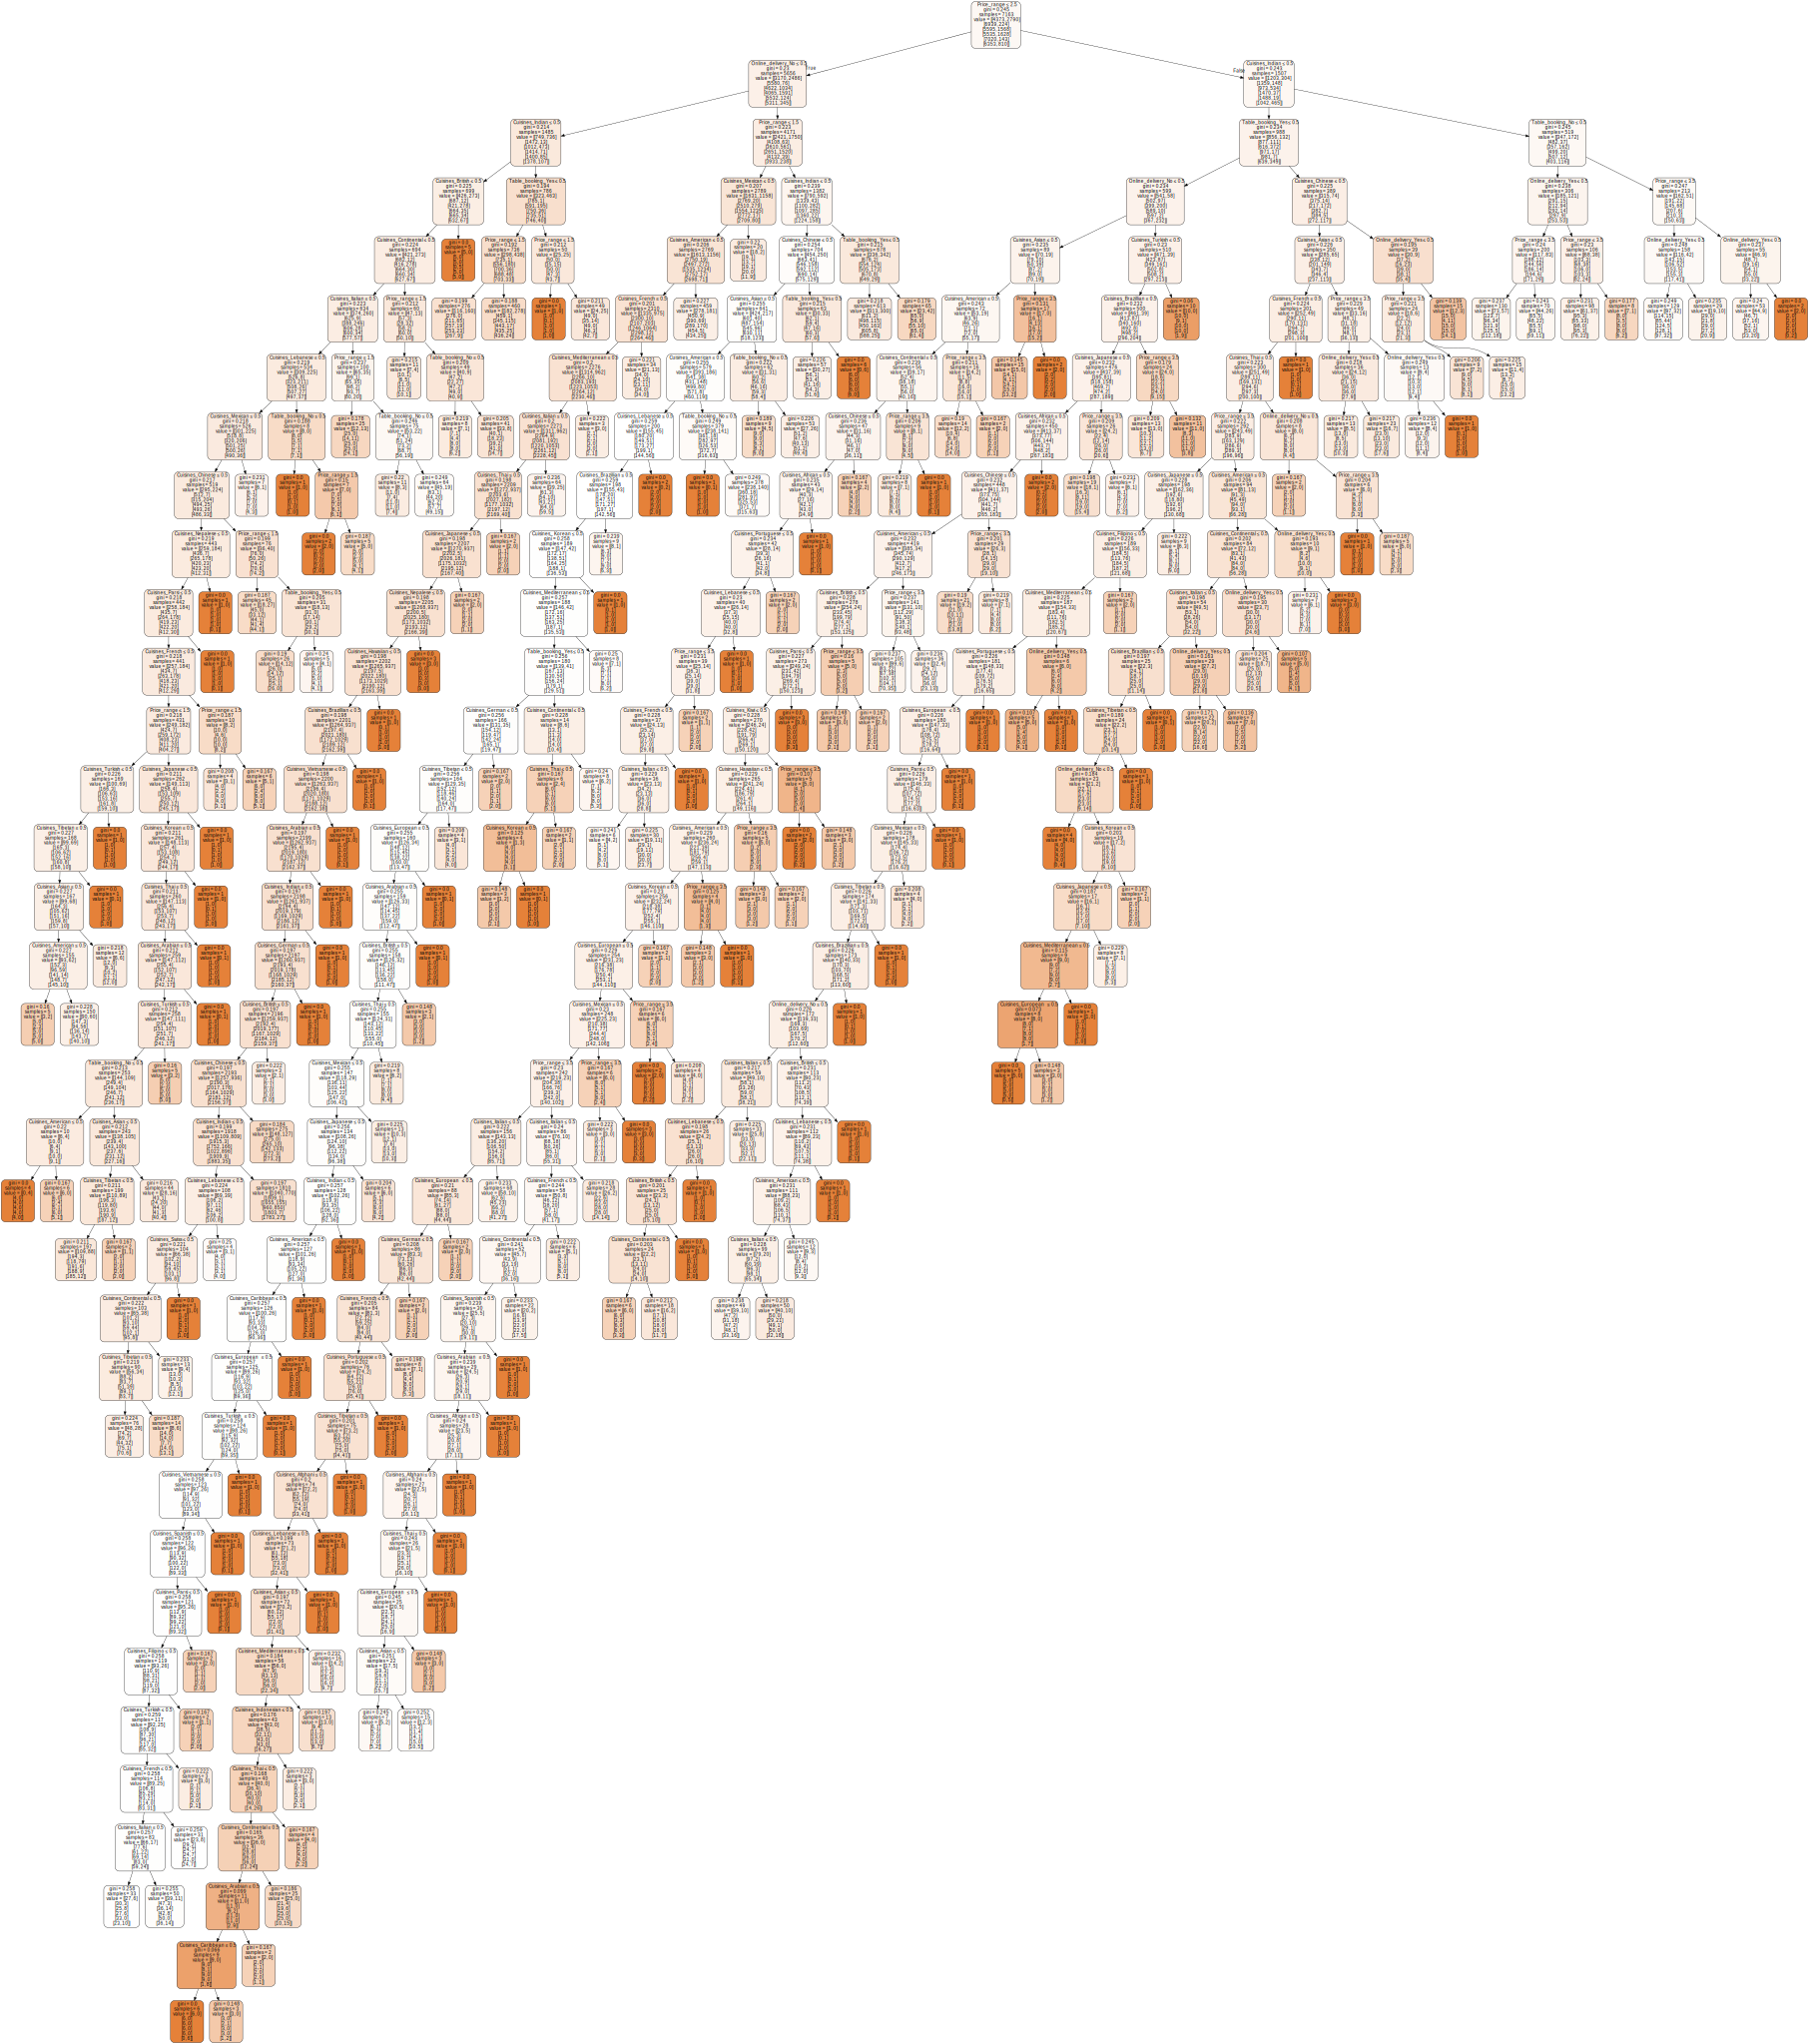

In [10]:
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=features_name,  
    class_names=y_train,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('restaurant.pdf')
graph = graphviz.Source(dot_data)

graph 